<a href="https://colab.research.google.com/github/notnsas/cautious-eureka/blob/main/pemodelan/Mamdani_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fuzzy_expert

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
  Created wheel for fuzzy_expert: filename=fuzzy_expert-0.1.0-py3-none-any.whl size=18505 sha256=f566c104bc08643584ed705beacc68afcb303fa2a0a919bd9ab2a7f6e0438bc3
  Stored in directory: /root/.cache/pip/wheels/64/80/25/7647a5db9d9cbe1ea2ea3494bb8303c02d9e2d2a314d76aa7a
Successfully built fuzzy_expert


In [2]:
import os

os.chdir('/workspaces/fuzzy-expert')

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/fuzzy-expert'

In [3]:
import warnings

warnings.filterwarnings("ignore")

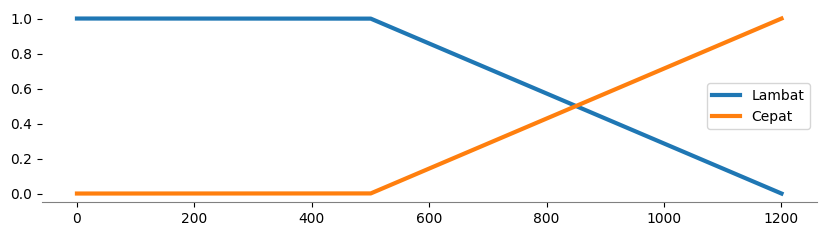

In [25]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable

variables = {
    "banyak_pakaian": FuzzyVariable(
        universe_range=(0, 100),
        terms={
            "Sedikit": [(40, 1), (80, 0)],
            "Banyak": [(40, 0), (80, 1)],
        },
    ),
    "kekotoran": FuzzyVariable(
        universe_range=(0, 100),
        terms={
            "Rendah": [(40, 1), (50, 0)],
            "Sedang": [(40, 0), (50, 1), (60, 0)],
            "Tinggi": [(50, 0), (60, 1)],
        },
    ),
    "putaran": FuzzyVariable(
        universe_range=(0, 1200),
        terms={
            "Lambat": [(500, 1), (1200, 0)],
            "Cepat": [(500, 0), (1200, 1)],
        },
    ),
}

plt.figure(figsize=(10, 2.5))
# variables["Banyak Pakaian"].plot()
# variables["Tingkat Kekotoran"].plot()
variables["putaran"].plot()


In [26]:
from fuzzy_expert.rule import FuzzyRule

rules = [
    FuzzyRule(
        premise=[
            ("banyak_pakaian", "Sedikit"),
            ("AND", "kekotoran", "Rendah"),
        ],
        consequence=[("putaran", "Lambat")],
    ),
    FuzzyRule(
        premise=[
            ("banyak_pakaian", "Sedikit"),
            ("AND", "kekotoran", "Sedang"),
        ],
        consequence=[("putaran", "Lambat")],
    ),
    FuzzyRule(
        premise=[
            ("banyak_pakaian", "Sedikit"),
            ("AND", "kekotoran", "Tinggi"),
        ],
        consequence=[("putaran", "Cepat")],
    ),
    FuzzyRule(
        premise=[
            ("banyak_pakaian", "Banyak"),
            ("AND", "kekotoran", "Rendah"),
        ],
        consequence=[("putaran", "Lambat")],
    ),
    FuzzyRule(
        premise=[
            ("banyak_pakaian", "Banyak"),
            ("AND", "kekotoran", "Sedang"),
        ],
        consequence=[("putaran", "Cepat")],
    ),
    FuzzyRule(
        premise=[
            ("banyak_pakaian", "Banyak"),
            ("AND", "kekotoran", "Tinggi"),
        ],
        consequence=[("putaran", "Cepat")],
    ),
]

print(rules[0])
print()
print(rules[1])

IF  banyak_pakaian IS Sedikit
    AND kekotoran IS Rendah
THEN
    putaran IS Lambat
CF = 1.00
Threshold-CF = 0.00


IF  banyak_pakaian IS Sedikit
    AND kekotoran IS Sedang
THEN
    putaran IS Lambat
CF = 1.00
Threshold-CF = 0.00



In [33]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=rules,
    banyak_pakaian=50,
    kekotoran=58,
)

({'putaran': np.float64(782.6128545848419)}, np.float64(1.0))

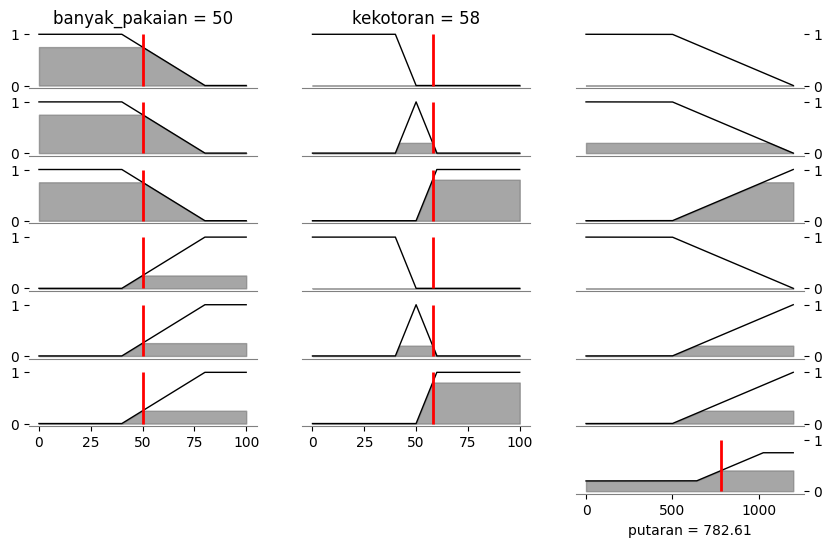

In [34]:
plt.figure(figsize=(10, 6))
model.plot(
    variables=variables,
    rules=rules,
    banyak_pakaian=50,
    kekotoran=58,
)

In [37]:
from ipywidgets import interact, widgets

def demo(`banyak_pakaian, kekotoran):
    plt.figure(figsize=(10,6))
    model.plot(
        variables=variables,
        rules=rules,
        banyak_pakaian=banyak_pakaian,
        kekotoran=kekotoran,
    )

interact(
    demo,
    banyak_pakaian=widgets.FloatSlider(min=0, max=100),
    kekotoran=widgets.FloatSlider(min=0, max=100),
)

interactive(children=(FloatSlider(value=0.0, description='banyak_pakaian'), FloatSlider(value=0.0, description…

<function __main__.demo(banyak_pakaian, kekotoran)>